In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#load 
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)


In [3]:
ecoding_dim=64

In [5]:
input_img=Input(shape=(784,))
encoded=Dense(256,activation='relu')(input_img)
encoded=Dense(128,activation='relu')(encoded)
encoded_output=Dense(64,activation='relu')(encoded)

decoded=Dense(128,activation='relu')(encoded_output)
decoded=Dense(256,activation='relu')(decoded)
decoded=Dense(784,activation='sigmoid')(decoded)


In [6]:
autoencoder=Model(input_img,decoded)

encoder=Model(input_img,encoded_output)

In [7]:
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0834 - val_loss: 0.0266
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0229 - val_loss: 0.0170
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0164 - val_loss: 0.0139
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


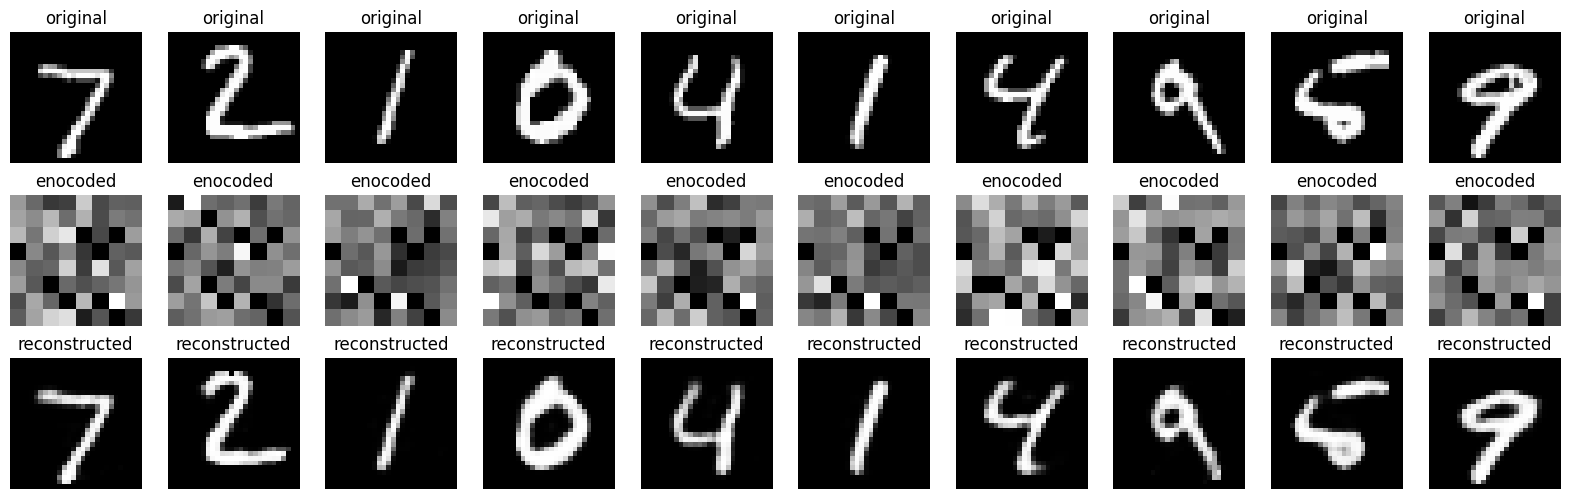

In [8]:
decoded_imgs=autoencoder.predict(x_test)
encoded_imgs=encoder.predict(x_test)

n=10
plt.figure(figsize=(20,6))
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("original")
    plt.gray()
    ax.axis('off')

    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(8,8))
    plt.title("enocoded")
    plt.gray()
    ax.axis('off')

    ax=plt.subplot(3,n,i+1+2*n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title("reconstructed")
    plt.gray()
    ax.axis('off')
    